In [99]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [100]:
from keras.datasets import mnist

In [101]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

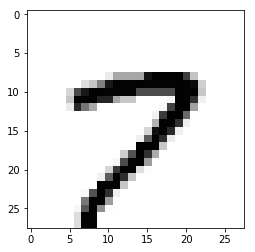

In [102]:
plt.imshow(x_train[123],cmap='Greys')

In [103]:
y_train[123]

7

In [104]:
x_train[123].shape

(28, 28)

In [105]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [106]:
from keras.utils import np_utils

In [107]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [108]:
y_test[123]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [109]:
x_train = x_train /255
x_test = x_test / 255

In [110]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

In [111]:
model = Sequential()

In [112]:
#filter (5*5) Conv 6 12 18 dense:20 50  maxpooling = 2*2

In [113]:
model.add(Conv2D(6, (5, 5), padding='same', input_shape=(28, 28, 1),
                activation='relu'))

In [114]:
model.add(MaxPool2D(pool_size = (2,2)))

In [115]:
model.add(Conv2D(12,(5,5),padding='same',activation = 'relu'))

In [116]:
model.add(MaxPool2D(pool_size = (2,2)))

In [117]:
model.add(Conv2D(18,(5,5),padding='same',activation = 'relu'))

In [118]:
model.add(MaxPool2D(pool_size = (2,2)))

In [119]:
model.add(Flatten())
model.add(Dense(20,activation = 'relu'))

In [120]:
model.add(Dense(50,activation = 'relu'))

In [121]:
model.add(Dense(70,activation = 'relu'))

In [122]:
model.add(Dense(10,activation = 'softmax'))

In [123]:
model.compile(loss = 'mse',optimizer = SGD(lr =0.07),metrics = ['accuracy'])

In [124]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 12)        1812      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 12)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 18)          5418      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 3, 18)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 162)               0         
__________

In [125]:
model.fit(x_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0896 - acc: 0.2424
Epoch 2/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0879 - acc: 0.2894
Epoch 3/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0659 - acc: 0.5206
Epoch 4/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0297 - acc: 0.8007
Epoch 5/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0194 - acc: 0.8722
Epoch 6/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0146 - acc: 0.9047
Epoch 7/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0120 - acc: 0.9211
Epoch 8/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0104 - acc: 0.9317
Epoch 9/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0092 - acc: 0.9397
Epoch 10/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0083 - acc: 0.946

In [126]:
score = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 4s 405us/step


In [127]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')

測試資料的 loss: 0.00708
測試資料的正確率: 0.9537


In [128]:
predict = model.predict_classes(x_test)

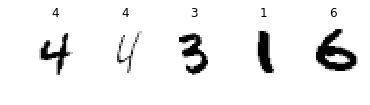

In [129]:
pick = np.random.randint(1,9999,5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28),cmap="Greys")
    plt.title(predict[pick[i]])
    plt.axis('off')
    